In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [9]:
data = pd.read_csv('code_review_dataset.csv')
data.head()

,code_snippets,quality_label
0,zk ruu idq,bug
1,v o xnqqxqb,style violation
2,xlab,bug
3,zjbjehcgwmnsakbwmkl,bug
4,z smgnlavf gxhrz,bug


In [10]:
# Preprocess code comments (tokenization, stemming, etc.)
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['code_snippets'])

In [11]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, data['quality_label'], test_size=0.2, random_state=42)

# Train a logistic regression model (you can use other classifiers too)
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
# Make predictions
y_pred = model.predict(X_test)

In [13]:
# Evaluate model performance
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)

                   precision    recall  f1-score   support

              bug       0.00      0.00      0.00        19
performance issue       0.00      0.00      0.00        15
  style violation       0.32      1.00      0.48        16

         accuracy                           0.32        50
        macro avg       0.11      0.33      0.16        50
     weighted avg       0.10      0.32      0.16        50



C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


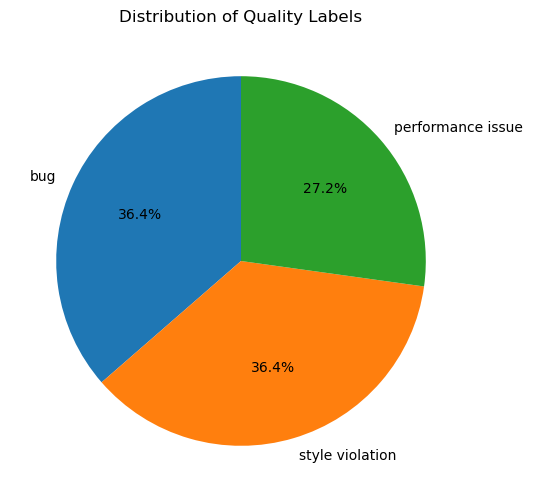

In [16]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Calculate the percentage of each quality label
quality_counts = data['quality_label'].value_counts()
quality_percents = quality_counts / quality_counts.sum() * 100

# Create a pie chart with desired fields
plt.figure(figsize=(10, 6))
plt.pie(quality_percents, labels=quality_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Quality Labels')
plt.show()


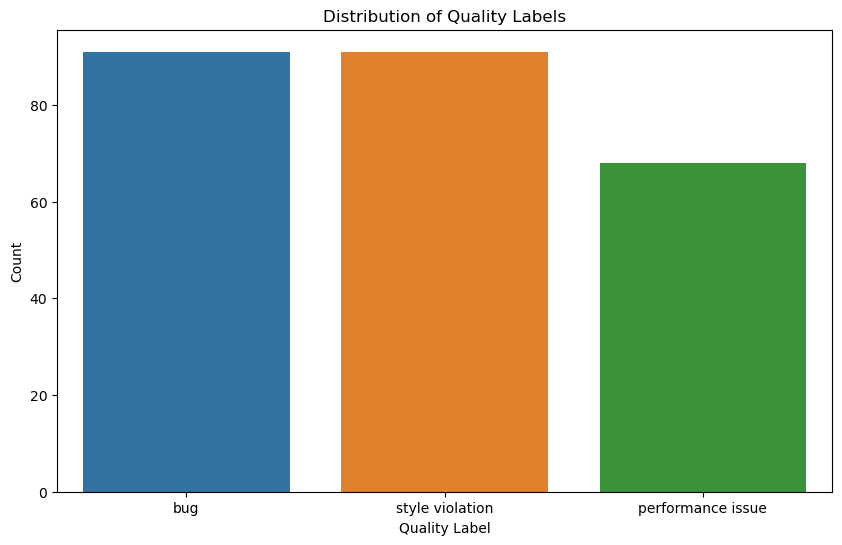

In [14]:
# Visualize data before predictions
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_label', data=data)
plt.title('Distribution of Quality Labels')
plt.xlabel('Quality Label')
plt.ylabel('Count')
plt.show()

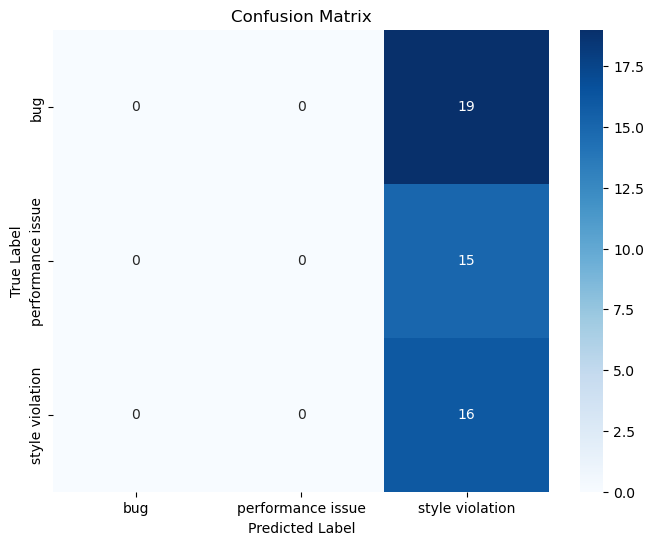

In [15]:

# Visualize data after predictions
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

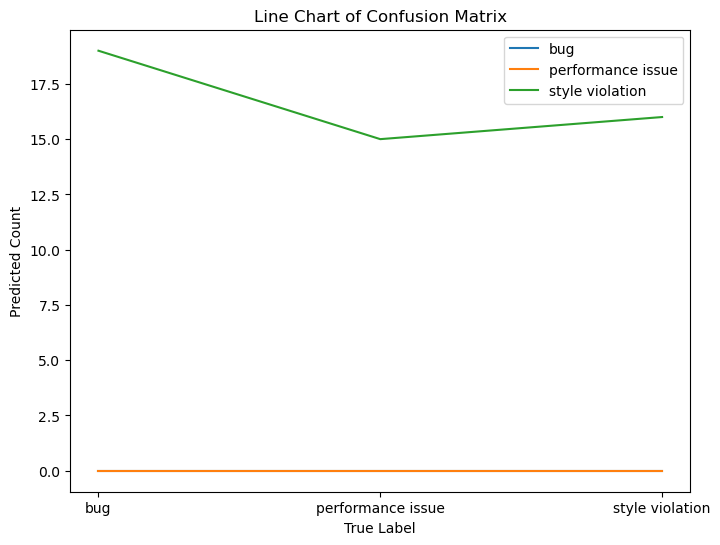

In [17]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a dataframe from the confusion matrix
df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

# Plot the line chart for each class
plt.figure(figsize=(8, 6))
for cls in model.classes_:
  plt.plot(df.index, df[cls], label=cls)
plt.title('Line Chart of Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Count')
plt.legend()
plt.show()


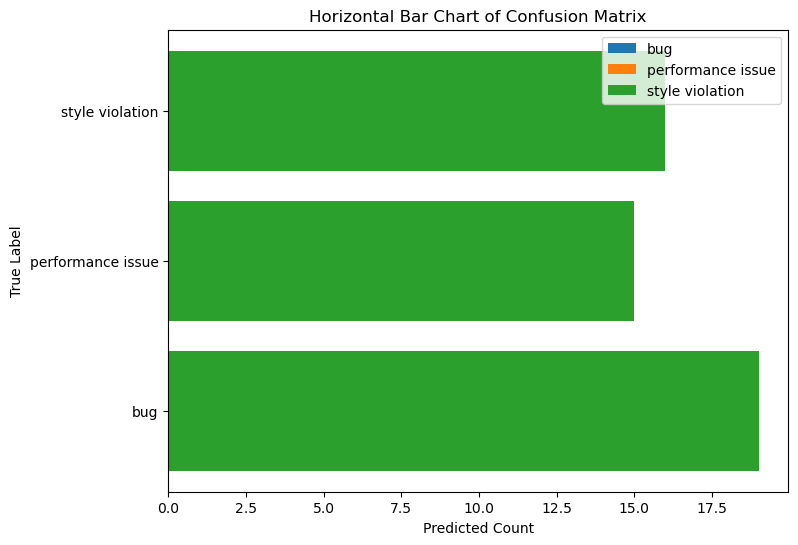

In [18]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a dataframe from the confusion matrix
df = pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_)

# Plot the horizontal bar chart for each class
plt.figure(figsize=(8, 6))
for cls in model.classes_:
  plt.barh(df.index, df[cls], label=cls)
plt.title('Horizontal Bar Chart of Confusion Matrix')
plt.xlabel('Predicted Count')
plt.ylabel('True Label')
plt.legend()
plt.show()
